In [1]:
import sys # Yi 2024
sys.path.insert(0,'/home/fenics/shared')

In [2]:
from dolfin import *

import numpy as np

import cell_geom as geom
import cell_material as mat
import cell_computation as comp

## Linear Backend

In [3]:
parameters['linear_algebra_backend'] = 'Eigen'

## Define Geometry

In [4]:
mesh = Mesh(r'../m_fine.xml') # Yi 2024

In [5]:
cell = geom.UnitCell(mesh)

In [6]:
# Add inclusion
inc = geom.InclusionCircle(2, (0.5, 0.5), 0.25)
inc_di = {'circle_inc': inc}
cell.set_append_inclusion(inc_di)

## Define Material

In [7]:
E_m, nu_m, E_i, nu_i = 10.0, 0.3, 1000.0, 0.3
mat_m = mat.st_venant_kirchhoff(E_m, nu_m)
mat_i = mat.st_venant_kirchhoff(E_i, nu_i)
mat_li = [mat_m, mat_i]

## Define Computation

In [8]:
VFS = VectorFunctionSpace(cell.mesh, "CG", 1, 
                          constrained_domain=geom.PeriodicBoundary_no_corner(2))

In [9]:
def deform_grad_with_macro(F_bar, w_component):
    return F_bar + grad(w_component)

In [10]:
w = Function(VFS)
strain_space = TensorFunctionSpace(mesh, 'DG', 0)
compute = comp.MicroComputation(cell, mat_li, 
                                [deform_grad_with_macro],
                                [strain_space])

In [11]:
F_bar = [0.9, 0., 0., 1.]

In [12]:
compute.input([F_bar], [w])

In [13]:
# comp.set_solver_parameters('non_lin_newton', lin_method='direct',
#                       linear_solver='cholesky')

In [14]:
compute.comp_fluctuation(print_progress=True, print_solver_info=False)

fluctuation computation finished


In [15]:
import matplotlib.pyplot as plt

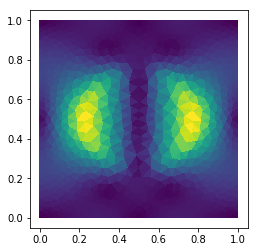

In [16]:
compute.view_fluctuation() # Yi 2024: interactive option is dropped! 
# see https://fenicsproject.discourse.group/t/what-happened-to-interactive/332
plt.show()

In [18]:
delta = 0.01

In [20]:
for i in range(10):
    F_bar[0] -= delta
    print( F_bar)
    compute.input([F_bar], [w])
    compute.comp_fluctuation(print_progress=True, print_solver_info=False)

[0.89, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.88, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.87, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.86, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.85, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.84, 0.0, 0.0, 1.0]
fluctuation computation finished
[0.83, 0.0, 0.0, 1.0]


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear system with NewtonSolver.
*** Reason:  Newton solver did not converge because maximum number of iterations reached.
*** Where:   This error was encountered inside NewtonSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  74d7efe1e84d65e9433fd96c50f1d278fa3e3f3f
*** -------------------------------------------------------------------------
